### Time Series Package Imports

In [1]:
#  NumPy and Pandas imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#  Reading time series
from pandas_datareader import data

#  Time stamps
import datetime as datetime

#  statistics package
from scipy import stats

#  Visualization (sns is a visualization library based on matplotlib)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
#  Stock tickers to retrieve historical index data
ticker_index_data = ['AMD', 'CSCO', 'INTC', 'MU', 'ORCL', 'QCOM']

start = '2017-10-10'
end = '2019-04-10'
#  Assign a database with historical stock quotes from Yahoo! Finance to each ticker
#for ticker in ticker_index_data:
    #globals()[ticker] = data.get_data_yahoo(ticker, start, end)
                                                    #  Changed start to 1.5 years

In [ ]:
#  The "axis" param of 1 represents concatenating along the column axis. 
#  The "keys" param is a hierarchical index for each technology stock ticker.
#tech_stocks = pd.concat([AMD, CSCO, INTC, MU, ORCL, QCOM], axis=1, keys=ticker_index_data)
#tech_stocks.columns.names = ['Stock Ticker', 'Stock Description']
#tech_stocks.columns


MultiIndex(levels=[['AMD', 'CSCO', 'INTC', 'MU', 'ORCL', 'QCOM'], ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']],
           codes=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5], [0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]],
           names=['Stock Ticker', 'Stock Description'])

## Daily Returns
------
### Daily Percentage Change
To quantify daily change, **percentage change** is calculated as the percentage difference between the prior
and current element. Using this function on the 'Adj Close' attribute gives the daily
return for the technology stock

The pandas DataFrame **.pct_change()** method returns the percentage change 

In [8]:
#  Get the closing prices for each tech stock
stock_closing_prices = data.DataReader(ticker_index_data, 'yahoo', start, end)['Adj Close']


In [9]:
#  Calculate the Daily Return for each stock
tech_daily_returns = stock_closing_prices.pct_change()
tech_daily_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 378 entries, 2017-10-10 to 2019-04-11
Data columns (total 6 columns):
AMD     377 non-null float64
CSCO    377 non-null float64
INTC    377 non-null float64
MU      377 non-null float64
ORCL    377 non-null float64
QCOM    377 non-null float64
dtypes: float64(6)
memory usage: 20.7 KB


### Summary of Returns 
We can see from the Daily Returns sample statistics that each stock averaged a positive return over
the observed period. It also displays the minimum return (biggest price drop) and the maximum
return (biggest price increase) for each stock. Standard deviation describes which stocks
were most volatile. The shape of the distribution is described through the mean and median. The
descriptive statistics show that CSCO, MU, and QCOM have a higher median than mean, so they
are negatively skewed. This means that there are more positive returns above the mean than below the mean,
so the mean must be skewed by negative returns.   

In [10]:
tech_daily_returns.describe()


Symbols,AMD,CSCO,INTC,MU,ORCL,QCOM
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,0.002654,0.001569,0.001201,0.000476,0.000459,0.000457
std,0.039583,0.014942,0.019850,0.030250,0.014355,0.018723
min,-0.154454,-0.052529,-0.085890,-0.098708,-0.094321,-0.081633
25%,-0.016918,-0.005552,-0.008827,-0.016053,-0.005119,-0.008238
50%,0.002024,0.002065,0.000897,0.000892,0.001625,0.000617
75%,0.022670,0.008961,0.012217,0.018915,0.008056,0.009259
max,0.199481,0.055042,0.105519,0.113706,0.044507,0.127097


### Visualizing Percentage Daily Returns
The Univariate Daily Percentage Change

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd62c274828>,
      dtype=object)

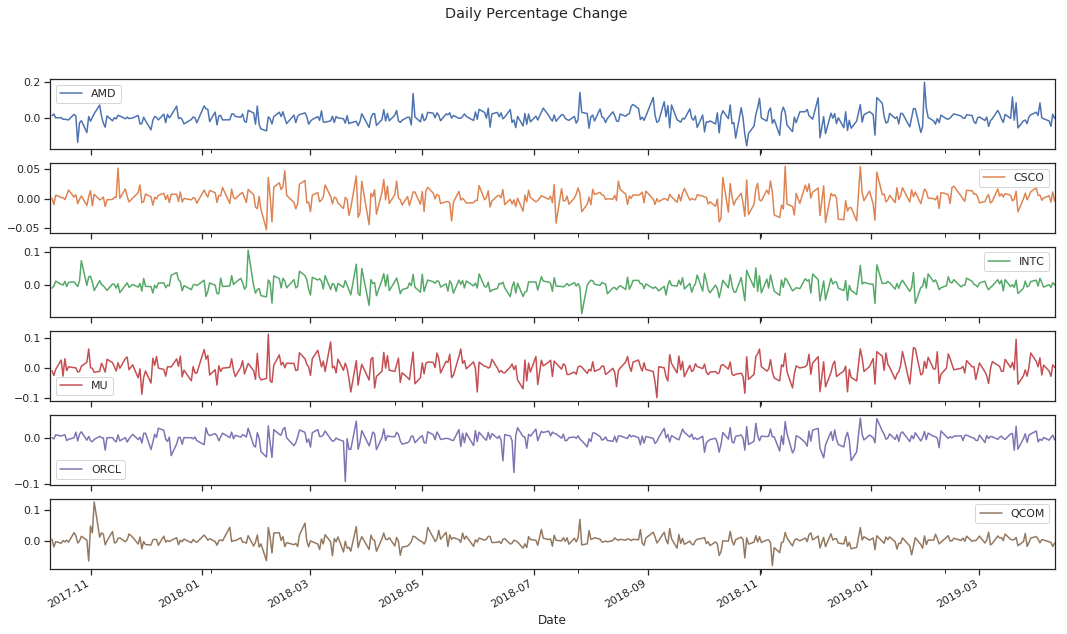

In [11]:
tech_daily_returns.plot(legend=True, title='Daily Percentage Change', subplots=True, figsize=(18,10))


### Visualizing correlation between combinations of stocks 
The diagonal shows the distribution of a single variable, the scatter plots
on the upper and lower triangles show the relationship between two variables. 

Linear regression models are fitted to the scatter plots.

kernel density estimates are fitted to the univariate plots 

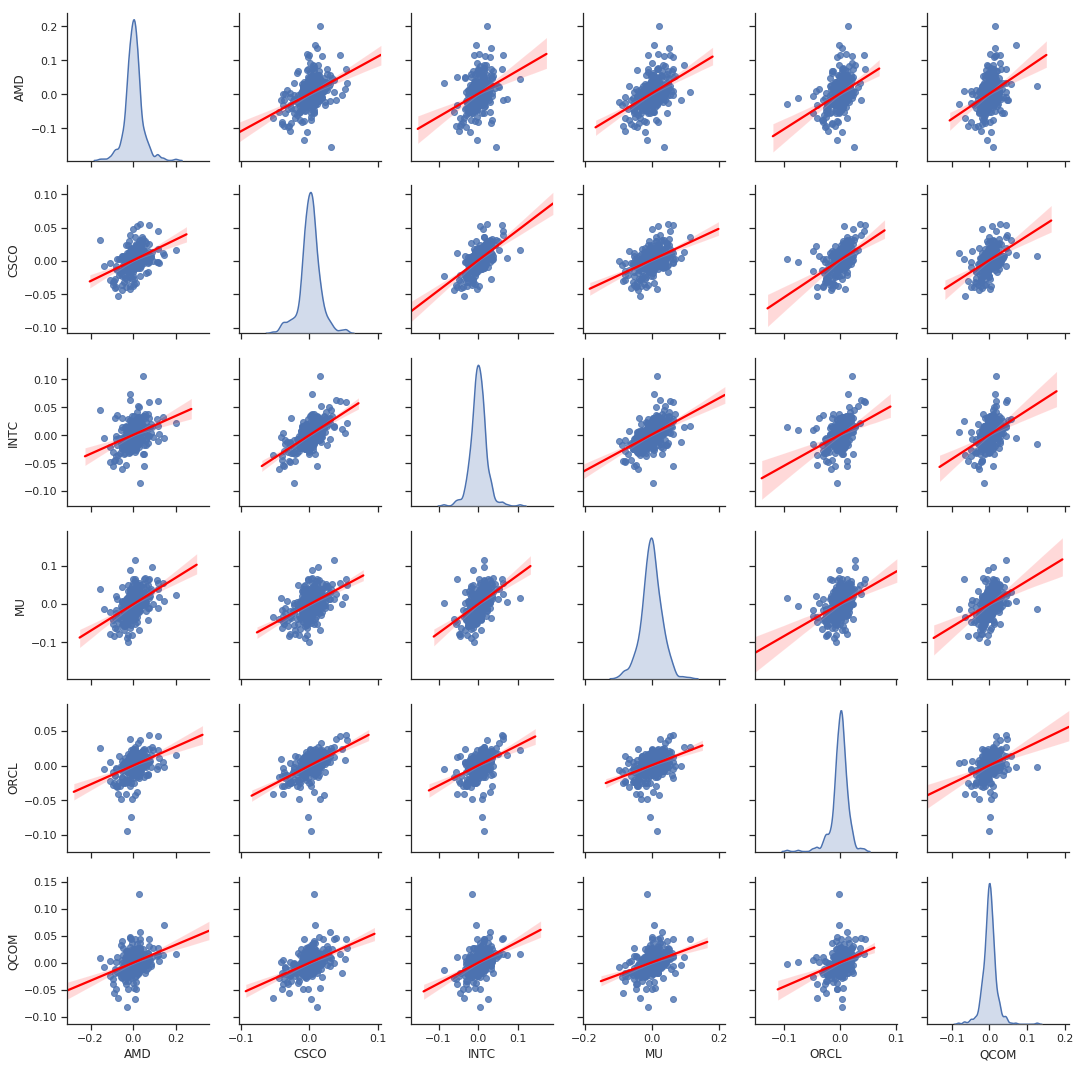

In [12]:
sns.set(style='ticks')
sns.pairplot(tech_daily_returns.dropna(), diag_kind='kde', kind='reg', 
             plot_kws={'line_kws': {'color' : 'red'}}) 

In [49]:
#  Daily returns Correlation matrix
daily_returns_corr = tech_daily_returns.corr()
daily_returns_corr.style.background_gradient(cmap='coolwarm').set_precision(3)

Symbols,AMD,CSCO,INTC,MU,ORCL,QCOM
Symbols,,,,,,
AMD,1,0.414,0.34,0.454,0.378,0.354
CSCO,0.414,1,0.6,0.472,0.535,0.452
INTC,0.34,0.6,1,0.494,0.402,0.411
MU,0.454,0.472,0.494,1,0.396,0.37
ORCL,0.378,0.535,0.402,0.396,1,0.343
QCOM,0.354,0.452,0.411,0.37,0.343,1


###### Cluster map 
For daily returns

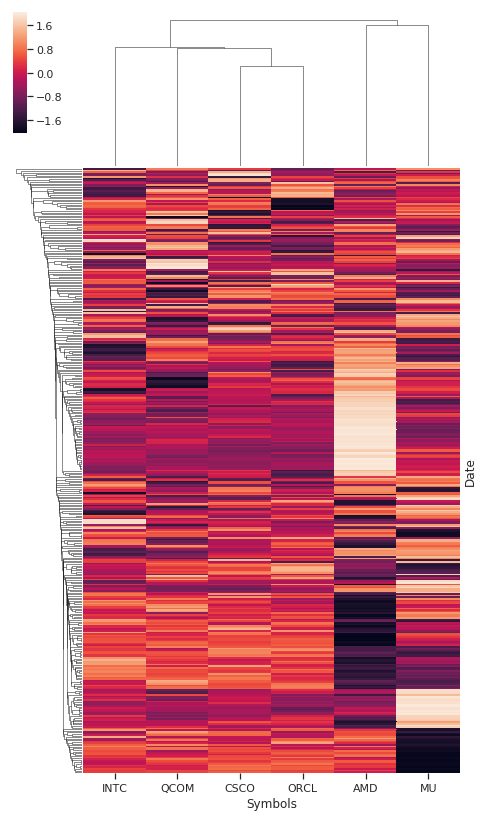

In [55]:
#  Each row is normalized for it's daily return with a z-score
#  The values are measured by correlation
#  Dendrogram displays the results of the cluster analysis
graph = sns.clustermap(tech_daily_returns.dropna(), metric="correlation", method='single', 
                       z_score=0, yticklabels=False, figsize=(8,14))


### Visualizing correlation between log scaled volume

In [13]:
#  Get the log scaled trading volume data
log_volume = data.DataReader(ticker_index_data, 'yahoo', start, end)['Volume']
log_volume = np.log(log_volume)

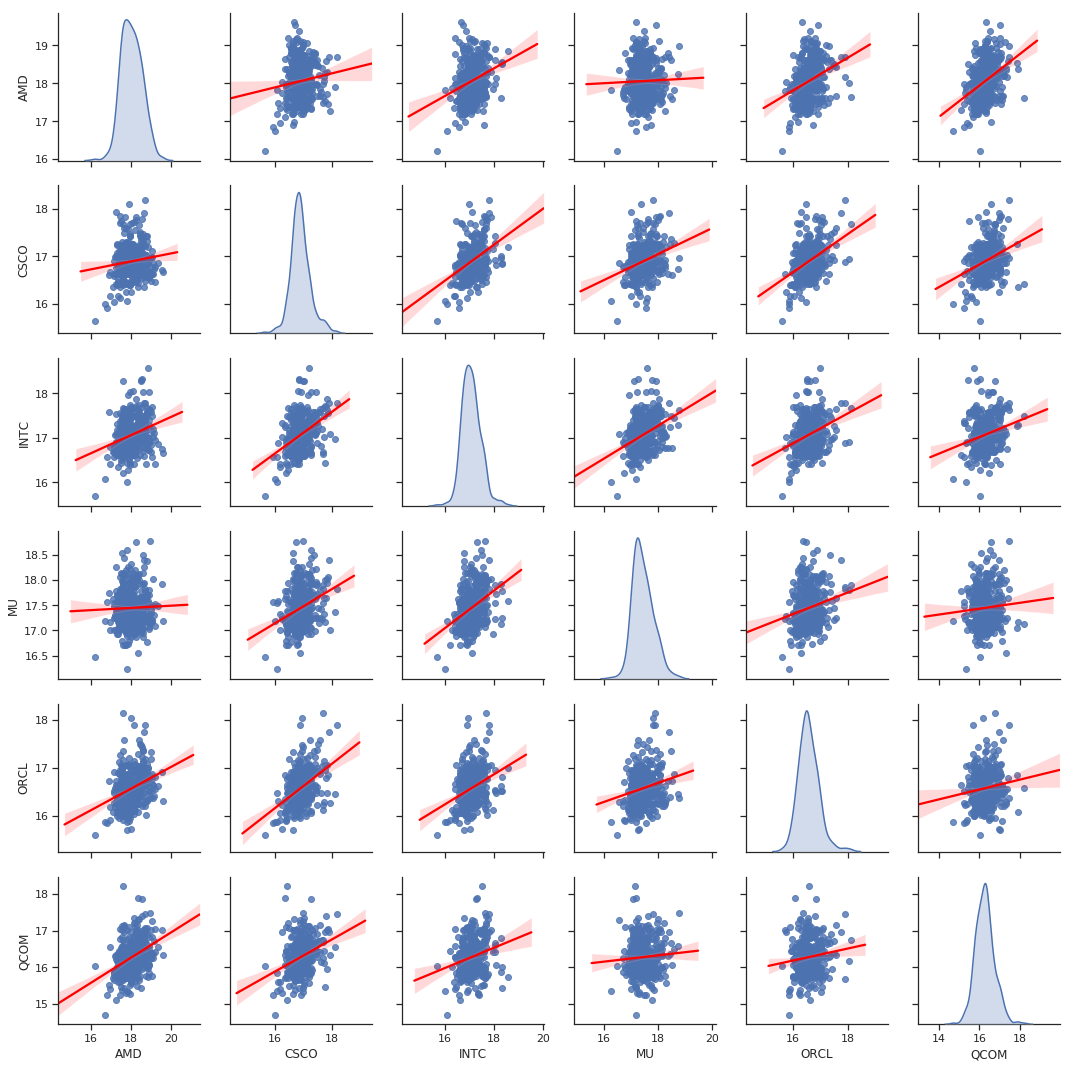

In [20]:
#  Pairplot the log scaled trading volume data
sns.set(style='ticks')
sns.pairplot(log_volume.dropna(), diag_kind='kde', kind='reg', 
             plot_kws={'line_kws': {'color' : 'red'}}) 

In [50]:
#  Trading Volume Correlation matrix
trading_volume_corr = log_volume.corr()
trading_volume_corr.style.background_gradient(cmap='coolwarm').set_precision(3)

Symbols,AMD,CSCO,INTC,MU,ORCL,QCOM
Symbols,,,,,,
AMD,1,0.125,0.273,0.0294,0.313,0.379
CSCO,0.125,1,0.42,0.303,0.43,0.324
INTC,0.273,0.42,1,0.37,0.324,0.228
MU,0.0294,0.303,0.37,1,0.205,0.0707
ORCL,0.313,0.43,0.324,0.205,1,0.13
QCOM,0.379,0.324,0.228,0.0707,0.13,1


###### Cluster map 
For trading volume

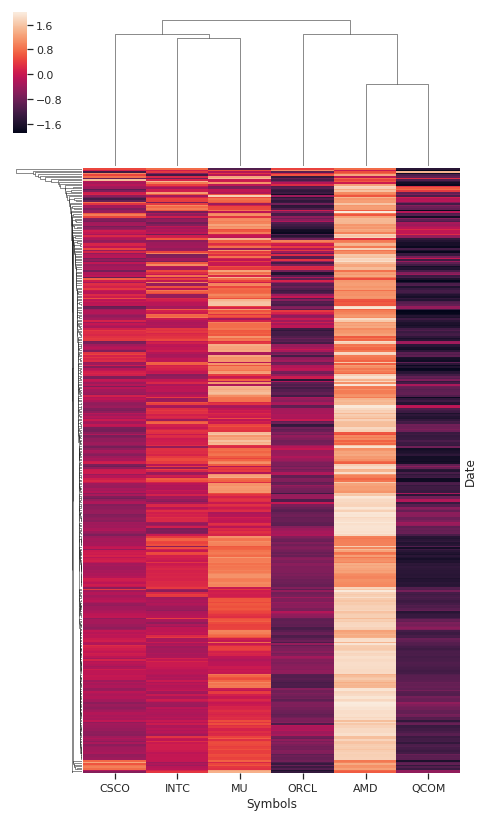

In [56]:
#  Each row is normalized for it's daily return with a z-score
#  The values are measured by correlation
#  Dendrogram displays the results of the cluster analysis
graph = sns.clustermap(log_volume.dropna(), metric="correlation", method='single', 
                       z_score=0, yticklabels=False, figsize=(8,14))

### Quantify Risk
Quantify risk by comparing expected return with the standard deviation of returns

In [79]:
tech_daily_returns.dropna()
quantify_risk = pd.DataFrame()
quantify_risk['Expected Return'] = tech_daily_returns.mean()
quantify_risk['Risk'] = tech_daily_returns.std()

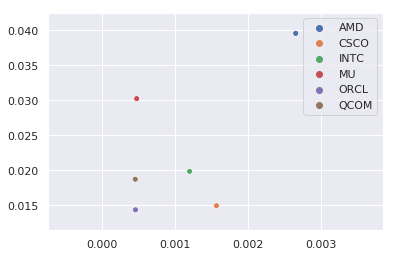

In [83]:
sns.set_style("darkgrid")
sns.scatterplot(x=tech_daily_returns.mean(), y=tech_daily_returns.std(), hue=ticker_index_data)
#sns.lmplot(x=quantify_risk[0], y=quantify_risk[1], data=quantify_risk, col=ticker_index_data, hue=ticker_index_data, fit_reg=False, scatter_kws={"s": 100})
#x='Expected Return', y='Risk',